In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
os.chdir(r'C:\Users\Lenovo\Desktop')

In [5]:
df=pd.read_csv('hotel_bookings.csv')

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [29]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [31]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

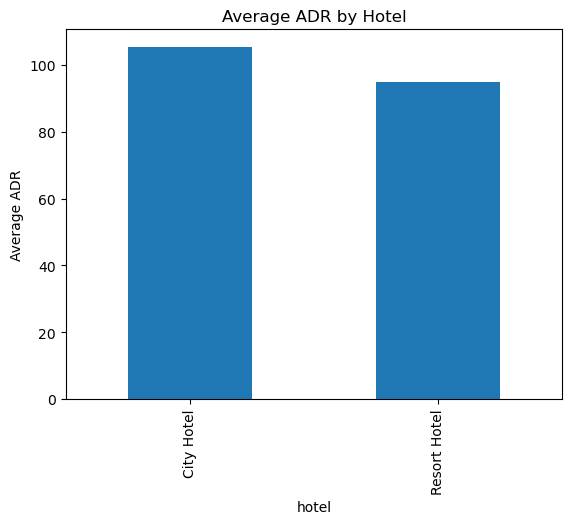

In [21]:
#1. Hotel with highest average daily rate (ADR)
avg_adr_by_hotel = df.groupby('hotel')['adr'].mean().sort_values(ascending=False)
avg_adr_by_hotel.plot(kind='bar', title='Average ADR by Hotel', ylabel='Average ADR')
plt.show()

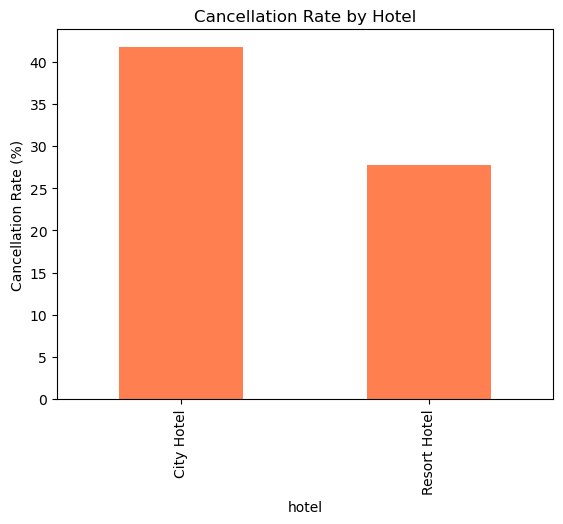

In [23]:
#2. Cancellation rate per hotel type
cancel_rate = df.groupby('hotel')['is_canceled'].mean() * 100
cancel_rate.plot(kind='bar', color='coral', title='Cancellation Rate by Hotel', ylabel='Cancellation Rate (%)')
plt.show()

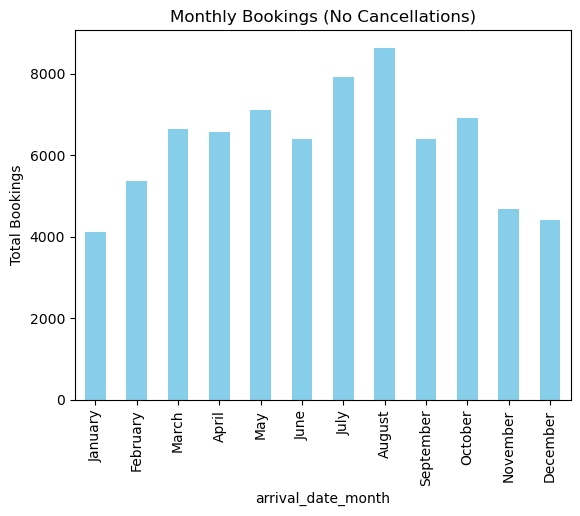

In [33]:
#3. Bookings per month (excluding cancellations)
bookings_per_month = df[df['is_canceled'] == 0]['arrival_date_month'].value_counts().reindex(months_order)
bookings_per_month.plot(kind='bar', color='skyblue', title='Monthly Bookings (No Cancellations)', ylabel='Total Bookings')
plt.show()

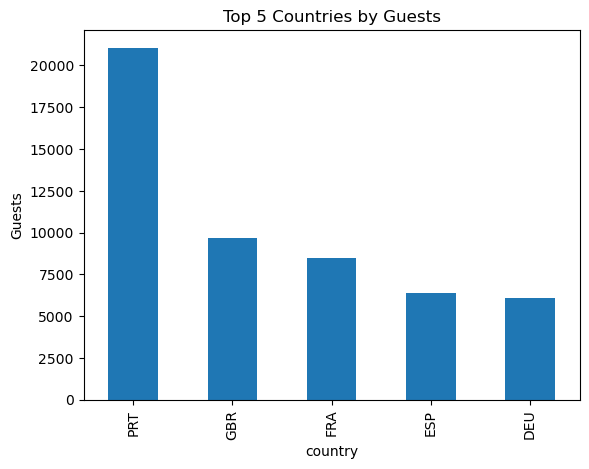

In [35]:
#4. Top 5 countries by number of guests (excluding cancellations)
top_countries = df[df['is_canceled'] == 0]['country'].value_counts().head(5)
top_countries.plot(kind='bar', title='Top 5 Countries by Guests', ylabel='Guests')
plt.show()

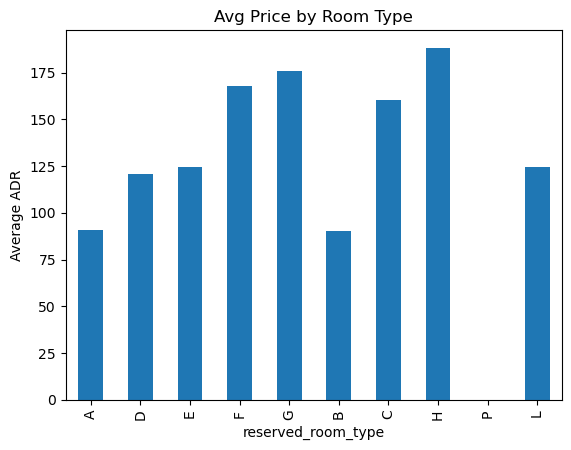

In [37]:
#5. Most frequently reserved room type and its average price
room_stats = df.groupby('reserved_room_type').agg(
    count=('reserved_room_type', 'count'),
    avg_price=('adr', 'mean')
).sort_values('count', ascending=False)
room_stats['avg_price'].plot(kind='bar', title='Avg Price by Room Type', ylabel='Average ADR')
plt.show()

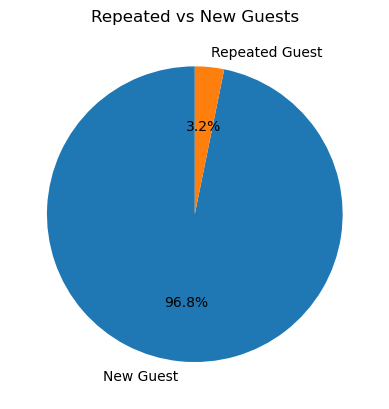

In [39]:
#6. Repeated vs New Guests
guest_type = df['is_repeated_guest'].map({0: 'New Guest', 1: 'Repeated Guest'}).value_counts()
guest_type.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Repeated vs New Guests')
plt.ylabel('')
plt.show()

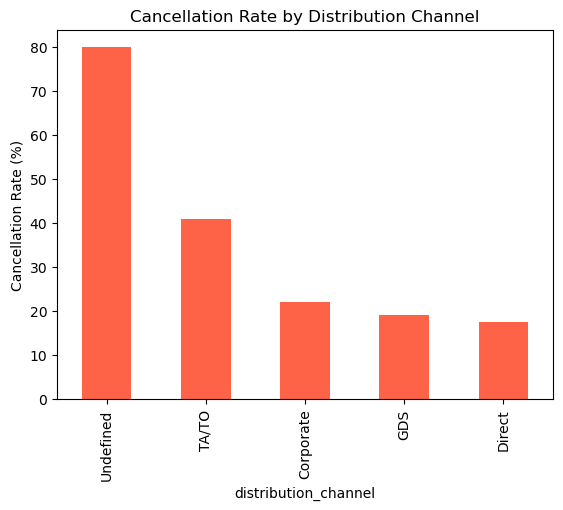

In [41]:
#7. Cancellation rate by distribution channel
dist_cancel = df.groupby('distribution_channel')['is_canceled'].agg(['count', 'sum'])
dist_cancel['cancellation_rate'] = (dist_cancel['sum'] / dist_cancel['count']) * 100
dist_cancel['cancellation_rate'].sort_values(ascending=False).plot(kind='bar', color='tomato', title='Cancellation Rate by Distribution Channel')
plt.ylabel('Cancellation Rate (%)')
plt.show()

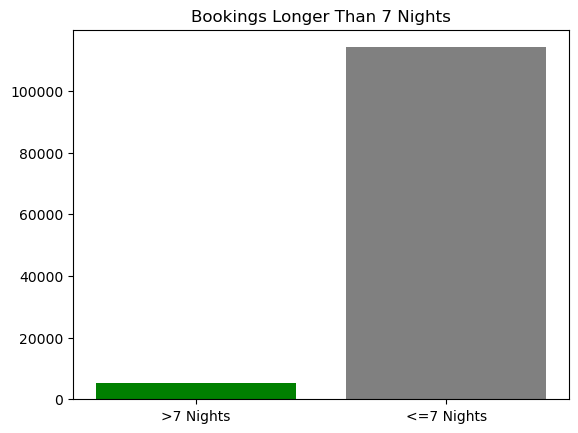

In [43]:
#8. Bookings longer than 7 nights
long_stay = df[(df['stays_in_weekend_nights'] + df['stays_in_week_nights']) > 7]
plt.bar(['>7 Nights', '<=7 Nights'], [len(long_stay), len(df) - len(long_stay)], color=['green', 'grey'])
plt.title('Bookings Longer Than 7 Nights')
plt.show()

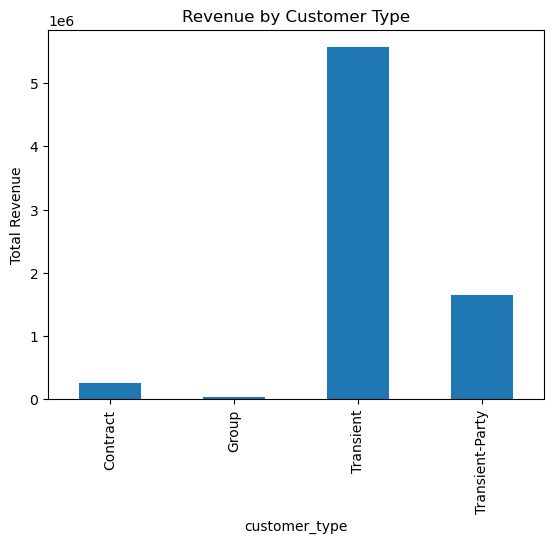

In [45]:
#9. Revenue by customer type
rev_by_customer = df[df['is_canceled'] == 0].groupby('customer_type')['adr'].sum()
rev_by_customer.plot(kind='bar', title='Revenue by Customer Type', ylabel='Total Revenue')
plt.show()

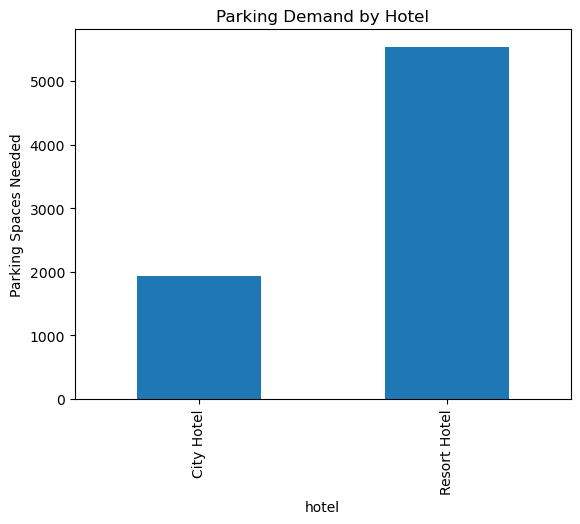

In [47]:
#10. Parking demand by hotel
parking_demand = df.groupby('hotel')['required_car_parking_spaces'].sum()
parking_demand.plot(kind='bar', title='Parking Demand by Hotel', ylabel='Parking Spaces Needed')
plt.show()

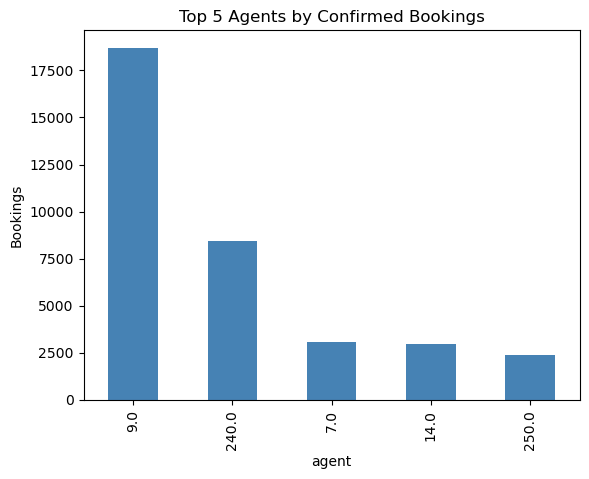

In [49]:
#11. Top 5 agents by confirmed bookings
top_agents = df[(df['is_canceled'] == 0) & (df['agent'].notnull())]['agent'].value_counts().head(5)
top_agents.plot(kind='bar', color='steelblue', title='Top 5 Agents by Confirmed Bookings')
plt.ylabel('Bookings')
plt.show()

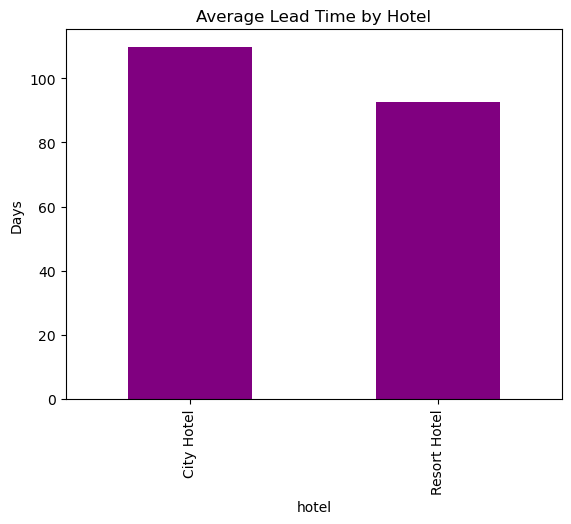

In [51]:
#12.Average lead time by hotel
avg_lead_time = df.groupby('hotel')['lead_time'].mean()
avg_lead_time.plot(kind='bar', color='purple', title='Average Lead Time by Hotel', ylabel='Days')
plt.show()